In [10]:
#Import Libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Question 01
### Apply the linear Transformations given

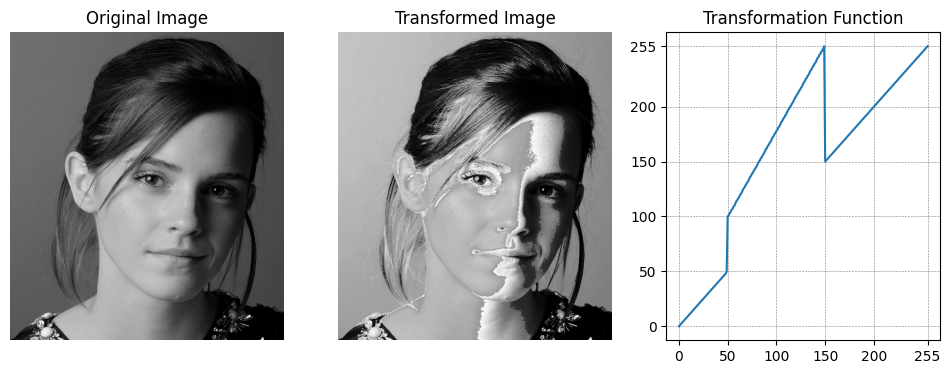

In [ ]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0,1], c[0,0]).astype('uint8')                 #from 0 to 49 = 50 parts
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')   #from 50 to 149 = 100 parts 
t3 = np.linspace(c[3,1], c[4,1], c[4,0] - c[3,0] + 1).astype('uint8') #from 150 to 255 = 106 parts

#Concatenate the three parts to form the complete transformation
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

#transform the image using the transformation function
f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
g = transform[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(transform)
ax[2].set_xticks(list(np.arange(0, 201, 50)) + [255])  # Custom x-ticks (0,50,100,...,200,255)
#ax[2].set_xticks(np.arange(0, 256, 10), minor=True)  # Minor ticks for finer grid
ax[2].set_yticks(list(np.arange(0, 201, 50)) + [255])  # Custom y-ticks (0,50,100,...,200,255)
#ax[2].set_yticks(np.arange(0, 256, 10), minor=True)  # Minor ticks
ax[2].set_title('Transformation Function')
#show grid
ax[2].grid(which='both', color='gray', linestyle='--', linewidth=0.4)
plt.show()

## Question 02
#### Apply a similar operation as above (question 1) to accentuate the following in the brain proton density image shown
- (a)white matter
- (b) gray matter


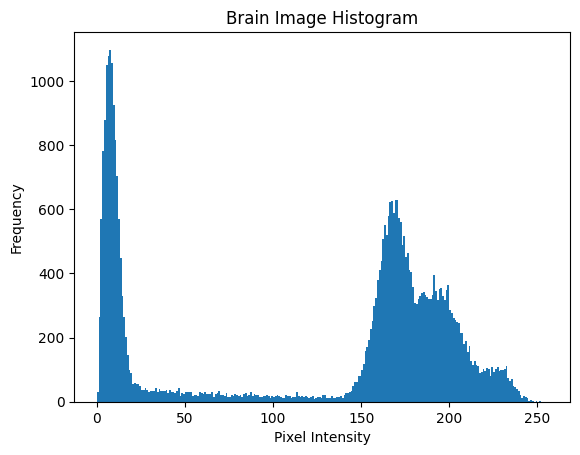

In [44]:
# Try to get an idea about the intensity distribution of the image to deceide whice transformation to apply when accentuating the gray matter and white matter
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
plt.hist(brain_img.ravel(), bins=256, range=(0, 256))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Brain Image Histogram')
plt.show()

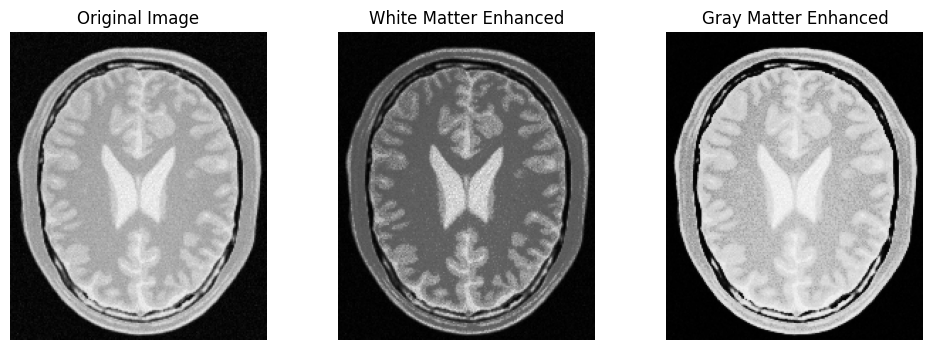

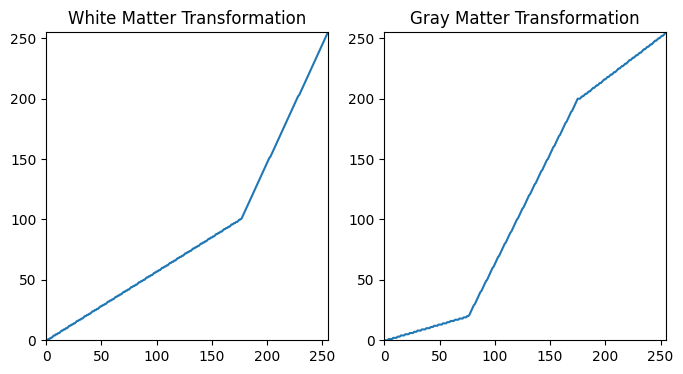

In [45]:
# White Matter Transformation
t1_wm = np.linspace(0, 100, 176).astype('uint8')  # from 0 to 175 = 176 parts
t2_wm = np.linspace(100, 255, 80).astype('uint8')  # from 176 to 255 = 80 parts
transform_wm = np.concatenate((t1_wm, t2_wm), axis=0).astype('uint8')

# Gray Matter Transformation
t1_gm = np.linspace(0, 20, 76).astype('uint8') # from 0 to 75 = 76 parts
t2_gm = np.linspace(20, 200, 100).astype('uint8')  # from 76 to 175 = 100 parts
t3_gm = np.linspace(200, 255, 80).astype('uint8')  # from 176 to 255 = 80 parts
transform_gm = np.concatenate((t1_gm, t2_gm, t3_gm), axis=0).astype('uint8')

# Load and transform the image 
f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
g_wm = transform_wm[f]  # white matter transformation
g_gm = transform_gm[f]  # gray matter transformation

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g_wm, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter Enhanced')
ax[2].imshow(g_gm, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter Enhanced')
for a in ax:
    a.axis('off')
plt.show()

# Transformation plots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(transform_wm)
ax[0].set_ylim([0, 255])
ax[0].set_xlim([0, 255])
ax[0].set_title('White Matter Transformation')
ax[1].plot(transform_gm)
ax[1].set_ylim([0, 255])
ax[1].set_xlim([0, 255])
ax[1].set_title('Gray Matter Transformation')
plt.show()

## Question 03
#### Consider the image shown
- (a) Apply gamma correction to the L plane in the L∗a∗ b∗ color space and state the γ value.
- (b) Show the histograms of the original and corrected images.

<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\m'
C:\Users\himet\AppData\Local\Temp\ipykernel_25696\3217221646.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax_gamma.set_ylabel('Output, $\mathrm{t}[\mathbf{L}]$')


Text(0, 0.5, 'Output, $\\mathrm{t}[\\mathbf{L}]$')

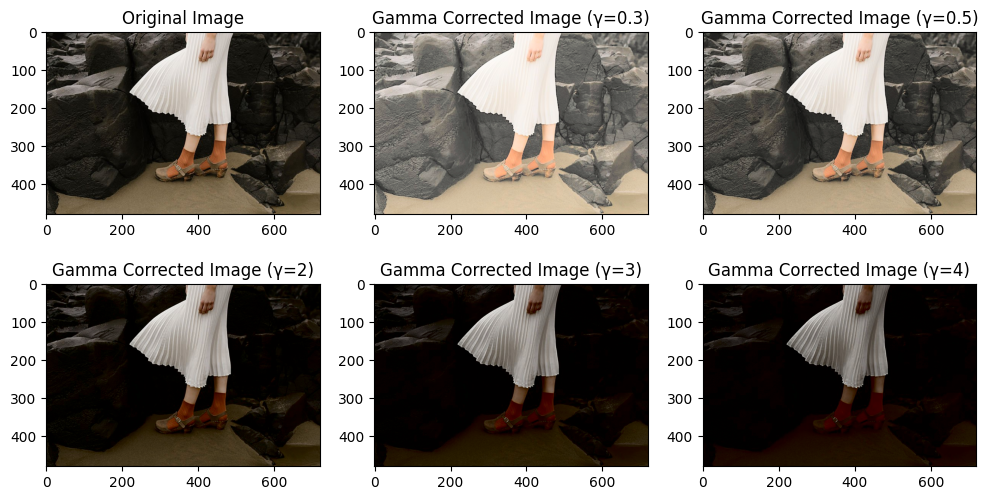

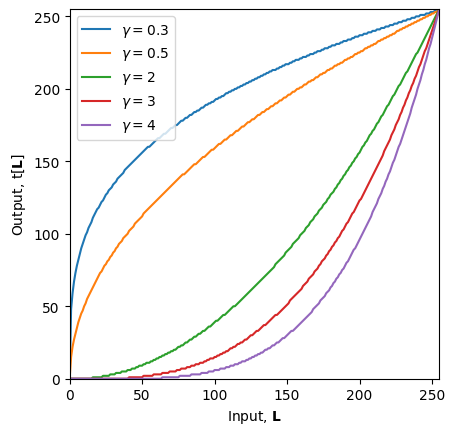

In [63]:
#load image in colour and show uisng matplotlib
image = cv.imread('a1images/highlights_and_shadows.jpg')
#Apply gamma correction to the L plane in the L∗a∗ b∗ color space and state the γ value.
image_lab = cv.cvtColor(image, cv.COLOR_BGR2Lab)
L,a,b = cv.split(image_lab)
gamma_vals = [0.3,0.5,2,3,4]  
fig_images, ax_images = plt.subplots(2, 3, figsize=(12, 6))
fig_gamma, ax_gamma = plt.subplots()
image_index = 0
for gamma in gamma_vals:
  t = np.array([((i/255)**gamma)*255 for i in np.arange(0,256)]).astype(np.uint8)  # Gamma correction transformation
  #plot the curve
  ax_gamma.plot(t, label=fr'$\gamma = {gamma}$')

  L_corrected = cv.LUT(L, t)  # Apply gamma correction
  image_corrected = cv.merge((L_corrected, a, b))
  # Convert back to BGR color space
  image_corrected_bgr = cv.cvtColor(image_corrected, cv.COLOR_Lab2BGR)
  #plot the original and corrected images
  image_index += 1
  ax_images[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  ax_images[0, 0].set_title('Original Image')
  ax_images[image_index//3, image_index % 3].imshow(cv.cvtColor(image_corrected_bgr, cv.COLOR_BGR2RGB))
  ax_images[image_index//3, image_index % 3].set_title(f'Gamma Corrected Image (γ={gamma})')

ax_gamma.legend(loc='upper left')
ax_gamma.set_xlim(0,255)
ax_gamma.set_ylim(0,255)
ax_gamma.set_aspect('equal')
ax_gamma.set_xlabel(r'Input, $\mathbf{L}$')
ax_gamma.set_ylabel('Output, $\mathrm{t}[\mathbf{L}]$')
